

# **In this notebook we will demonstrate how to )**

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%pylab inline
import numpy.lib.recfunctions as rfn
import illustris_python as il
import scipy.stats as st
from pandas import *
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
litte_h = 0.6774

basePath= '/verafs/home/yjagvara/gal_decomp_paper/gal_decomp_paper/TNG100-1_99_galaxy_scale_len_height_no-idx-bound_Cis1_5r.dat' # change this as suited
data  = np.genfromtxt(basePath,names=True) 

basePath2=  '/verafs/scratch/phy200017p/share/TNG100-1/output'
fields=['SubhaloMassType','SubhaloGrNr']
snapNum=99
subhalos=il.groupcat.loadSubhalos(basePath2,snapNum,fields=fields)
mass=subhalos['SubhaloMassType'][:,4]*10**10
mass=mass[data['gal_id'].astype('int')]/litte_h
data = rfn.rec_append_fields(data, 'mass', mass  ,dtypes='f16')


Populating the interactive namespace from numpy and matplotlib


In [2]:
data= data[log10(data['mass'])>10.0] #use only galaxies with log10(M*/M_\odot)>10.0

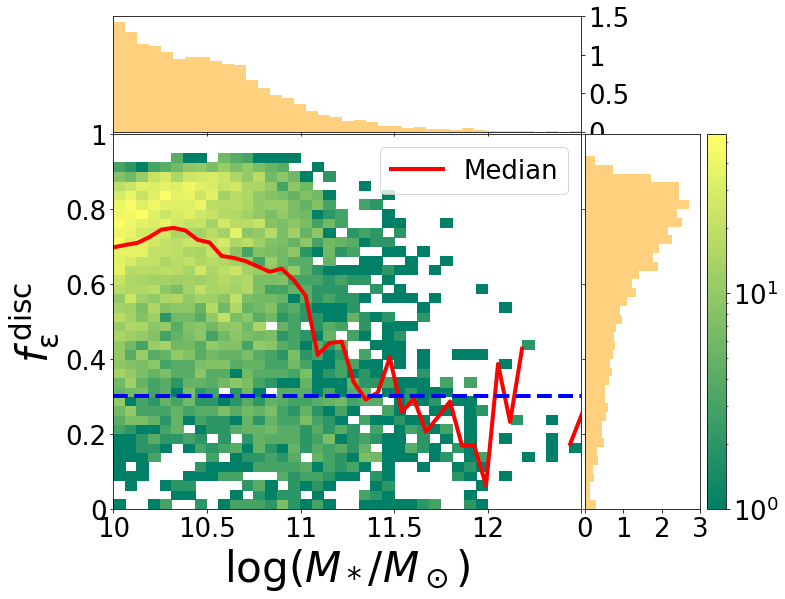

In [3]:
def scatter_hist(mass, frac, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    bins=40
    H, xedges, yedges = np.histogram2d(mass, frac,bins=bins,  range = [[10, 12.5], [0, 1]])
    H_norm_cols = H.T  
    pc=ax.pcolormesh(xedges,yedges,H_norm_cols ,cmap='summer',norm=matplotlib.colors.LogNorm())
    #colorbar(pc)
    y=frac
    w=st.binned_statistic(mass, y, statistic=lambda y: sum(i>0.3 for i in y)/len(y),bins=bins )
    #ax.plot(w[1][:-1],w[0] ,color='orange', label='BTR<0.7')

    w=st.binned_statistic(mass, y, statistic='median',bins=bins )
    ax.plot(w[1][:-1],w[0] ,color='red', lw=4,label='Median')
    
    ax.set_xlim(10,12.5)
    ax.legend(fontsize=26)
    ax.set_ylim(0,1)
    ax.set_ylabel(r'$f^\mathrm{\, disc}_\mathrm{\epsilon}$', fontsize = 42)
    ax.set_xlabel('$\log{(M_*/M_\odot)}$', fontsize = 42)
    ax.set_yticks([ 0,0.2,0.4,0.6,0.8,1])
    ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1], fontsize = 26)
    ax.set_xticklabels([10,10.5,11,11.5,12], fontsize = 26)
    colorbar(pc).ax.tick_params(labelsize=26)
    

    ax_histx.hist(mass, bins=bins,color='orange',alpha=0.5,density=True )
    #ax_histx.legend(fontsize=15)
    
    ax_histy.hist(frac, bins=bins, color='orange',alpha=0.5,orientation='horizontal',density=True )
     
    ax_histx.set_yticks([0,0.5,1,1.5])
    ax_histx.set_yticklabels([0,0.5,1,1.5], fontsize = 26)
    ax_histx.yaxis.tick_right()
    ax.axhline(0.3,color='blue', ls= '--',lw=4)
    ax_histy.set_xticks([0,1,2,3])
    ax_histy.set_xticklabels([0,1,2,3], fontsize = 26)
    #ax_histy.yaxis.tick_right()
 
 
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figureplt.subplot(2,4,1)
data_mass = data[log10(data['mass'])>10]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)
#plt.rcParams["mathtext.fontset"] = "cm"
# use the previously defined function
scatter_hist(log10(data_mass['mass']) , data_mass['f_disk'], ax, ax_histx, ax_histy)
#plt.savefig('f_eps_vs_mass.png', dpi=300,bbox_inches='tight')

